In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import math

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
     names=['Class', 'Alcohol', 'Malic acid',
    'Ash', 'Alcalinity of ash', 
    'Magnesium', 'Total phenols', 'Flavanoids', 
    'Nonflavanoid phenols', 'Proanthocyanins', 
    'Color intensity', 'Hue', 
    'OD280/OD315 of diluted wines', 
    'Proline'])
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Text(0.5,0,'Class')

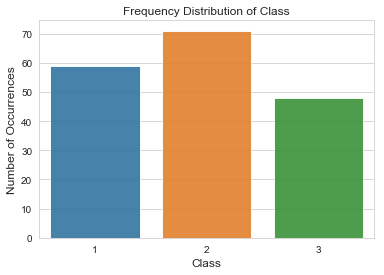

In [3]:
class_count = df['Class'].value_counts()
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of Class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)

## Hitung Manual Tanpa Library

In [4]:
n_class1 = df['Class'][df['Class'] == 1].count()
n_class2 = df['Class'][df['Class'] == 2].count()
n_class3 = df['Class'][df['Class'] == 3].count()

total_class = df['Class'].count()

In [5]:
n_class1, n_class2, n_class3

(59, 71, 48)

In [6]:
P_class1 = n_class1 / total_class
P_class2 = n_class2 / total_class
P_class3 = n_class3 / total_class

In [7]:
print('Probabilitas prior')
print('Class 1 : ',P_class1)
print('Class 2 : ',P_class2)
print('Class 3 : ',P_class3)

Probabilitas prior
Class 1 :  0.33146067415730335
Class 2 :  0.398876404494382
Class 3 :  0.2696629213483146


(-1.122924334903613, 1.10109163499541, -1.1104096067418847, 1.1020683589053433)

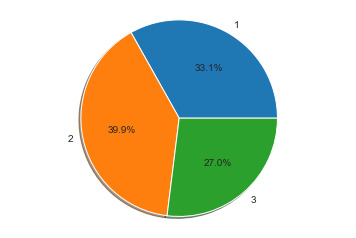

In [8]:
labels = df['Class'].astype('category').cat.categories.tolist()
counts = df['Class'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')

#### Mengelompokkan data berdasarkan class dan menghitung mean

In [9]:
data_means = df.groupby('Class', as_index=False).mean()

data_means

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


#### Mengelompokkan data berdasarkan class dan menghitung variance

In [10]:
data_variance = df.groupby('Class', as_index=False).var()

data_variance

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.213560,0.474100,0.051604,6.483758,110.227937,0.114895,0.158001,0.004907,0.169834,1.534063,0.013568,0.127504,49071.450029
1,2,0.289406,1.031380,0.099520,11.220962,280.679678,0.297419,0.498014,0.015366,0.362486,0.855494,0.041183,0.246585,24715.367807
2,3,0.281156,1.183539,0.034110,5.099291,118.602394,0.127428,0.086145,0.015411,0.167147,5.340454,0.013097,0.074045,13247.329344


In [11]:
# Create a function that calculates p(x | y):
def p_x_given_y(x, mean_y, variance_y):    
    for i in range(mean_y.shape[0]):
        for j in range(mean_y.shape[1]):
            p = 1/(np.sqrt(2*np.pi*variance_y.iloc[i][j])) * \
                np.exp((-(x[j]-mean_y.iloc[i][j])**2)\
                       /(2*variance_y.iloc[i][j]))
            if (j != 0):
                p *= p
    return p

In [12]:
def predict(p1, p2, p3):
    Max = p1
    result = "Data terbaru masuk ke kelas 1"
    if p2 > Max:
        Max = p2
        result = "Data terbaru masuk ke kelas 2"
    if p3 > Max:
        Max = p3
        result = "Data terbaru masuk ke kelas 3"
        if p2 > p3:
            Max = p2
            result = "Data terbaru masuk ke kelas 2"
    return result

#### Misal, kita ingin memprediksi wine dengan nilai dari setiap fitur berikut terklasifikasi sebagai kelas apa:
- Alcohol : 12.98
- Malic acid : 4.78
- Ash : 3.33
- Alcalinity of ash : 11.11
- Magnesium : 99
- Total phenols : 2.22
- Flavanoids : 4.44
- Nonflavanoid phenols : 0.55
- Proanthocyanins : 1.11
- Color intensity : 5.55
- Hue : 0.99
- OD280/OD315 of diluted wines : 2.87
- Proline : 999

In [13]:
y = np.array([12.98, 4.78, 3.33, 11.11, 99, 2.22, 4.44, 0.55, 1.11, 5.55, 0.99, 2.87, 999])                 

#### Calculate Mean and Variance for Each Class

In [14]:
class1_means = data_means[data_means['Class'] == 1]
class1_means = class1_means.drop('Class', axis=1)

class2_means = data_means[data_means['Class'] == 2]
class2_means = class2_means.drop('Class', axis=1)

class3_means = data_means[data_means['Class'] == 3]
class3_means = class3_means.drop('Class', axis=1)

In [15]:
class1_variance = data_variance[data_variance['Class'] == 1]
class1_variance = class1_variance.drop('Class', axis = 1)

class2_variance = data_variance[data_variance['Class'] == 2]
class2_variance = class2_variance.drop('Class', axis = 1)

class3_variance = data_variance[data_variance['Class'] == 3]
class3_variance = class3_variance.drop('Class', axis = 1)

In [16]:
class1_posterior = P_class1 * p_x_given_y(y, class1_means, class1_variance)
class2_posterior = P_class2 * p_x_given_y(y, class2_means, class2_variance)
class3_posterior = P_class3 * p_x_given_y(y, class3_means, class3_variance)

In [17]:
class1_posterior, class2_posterior, class3_posterior

(8.144570603949334e-07, 2.3425468643411857e-10, 1.1070099163261704e-10)

In [18]:
predict(class1_posterior, class2_posterior, class3_posterior)

'Data terbaru masuk ke kelas 1'

# Using Library

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report

In [20]:
from sklearn.metrics import accuracy_score

# Train Test Split

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

In [22]:
# Split dataset in training and test datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.9, random_state = 0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.7, random_state = 0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Frekuensi Distribusi Kelas Setiap Percobaan

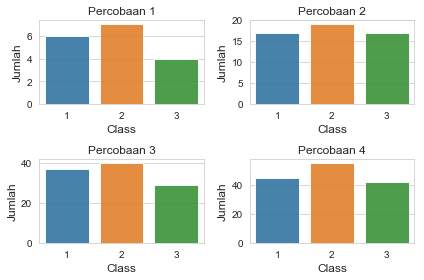

In [23]:
y1_count = y1_train.value_counts()
plt.subplot(221)
sns.barplot(y1_count.index, y1_count.values, alpha=0.9)
plt.title('Percobaan 1')
plt.ylabel('Jumlah', fontsize=12)
plt.xlabel('Class', fontsize=12)
y2_count = y2_train.value_counts()
plt.subplot(222)
sns.barplot(y2_count.index, y2_count.values, alpha=0.9)
plt.title('Percobaan 2')
plt.ylabel('Jumlah', fontsize=12)
plt.xlabel('Class', fontsize=12)
y3_count = y3_train.value_counts()
plt.subplot(223)
sns.barplot(y3_count.index, y3_count.values, alpha=0.9)
plt.title('Percobaan 3')
plt.ylabel('Jumlah', fontsize=12)
plt.xlabel('Class', fontsize=12)
y4_count = y4_train.value_counts()
plt.subplot(224)
sns.barplot(y4_count.index, y4_count.values, alpha=0.9)
plt.title('Percobaan 4')
plt.ylabel('Jumlah', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.tight_layout()

In [25]:
table = pd.DataFrame({'Percobaan': [1,2,3,4],
              'Training Set': [X1_train.shape[0], X2_train.shape[0], X3_train.shape[0], X4_train.shape[0]],
              'Test Set': [X1_test.shape[0], X2_test.shape[0], X3_test.shape[0], X4_test.shape[0]]})
table.set_index('Percobaan')

,Training Set,Test Set
Percobaan,,
1,17,161
2,53,125
3,106,72
4,142,36


In [26]:
# Instantiate the classifier
gnb = GaussianNB()

# Train classifier
gnb.fit(X1_train, y1_train)
y1_pred = gnb.predict(X1_test)
acc1 = gnb.score(X1_test, y1_test) * 100
print("Accuracy 1 :", acc1)
print(classification_report(y1_test,y1_pred))

gnb.fit(X2_train, y2_train)
y2_pred = gnb.predict(X2_test)
acc2 = gnb.score(X2_test, y2_test) * 100
print("Accuracy 2 :", acc2)
print(classification_report(y2_test,y2_pred))

gnb.fit(X3_train, y3_train)
y3_pred = gnb.predict(X3_test)
acc3 = gnb.score(X3_test, y3_test) * 100
print("Accuracy 3 :", acc3)
print(classification_report(y3_test,y3_pred))

gnb.fit(X4_train, y4_train)
y4_pred = gnb.predict(X4_test)
acc4 = gnb.score(X4_test, y4_test) * 100
print("Accuracy 4 :", acc4)
print(classification_report(y4_test,y4_pred))

Accuracy 1 : 90.6832298136646
             precision    recall  f1-score   support

          1       0.84      0.96      0.89        53
          2       0.95      0.81      0.87        64
          3       0.96      0.98      0.97        44

avg / total       0.91      0.91      0.91       161

Accuracy 2 : 96.8
             precision    recall  f1-score   support

          1       0.95      1.00      0.98        42
          2       1.00      0.92      0.96        52
          3       0.94      1.00      0.97        31

avg / total       0.97      0.97      0.97       125

Accuracy 3 : 94.44444444444444
             precision    recall  f1-score   support

          1       0.92      1.00      0.96        22
          2       1.00      0.87      0.93        31
          3       0.90      1.00      0.95        19

avg / total       0.95      0.94      0.94        72

Accuracy 4 : 91.66666666666666
             precision    recall  f1-score   support

          1       0.88      1.00

## Hasil akurasi setiap percobaan

In [27]:
acc_score = [acc1, acc2, acc3, acc4]
acc_table = pd.DataFrame({'Percobaan':[1,2,3,4],
                         'Accuracy Score': acc_score})

acc_table.set_index('Percobaan')

,Accuracy Score
Percobaan,
1,90.683230
2,96.800000
3,94.444444
4,91.666667


([<matplotlib.axis.YTick at 0x2175117ee80>,
 <a list of 11 Text yticklabel objects>)

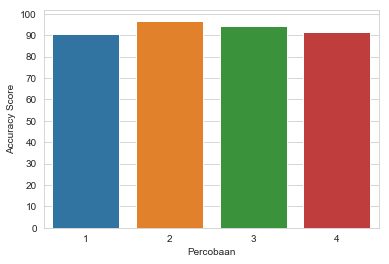

In [34]:
sns.barplot(x=acc_table['Percobaan'], y=acc_table['Accuracy Score'])
plt.yticks(np.arange(0,101,10))